In [8]:
%load_ext autoreload
%autoreload 2

In [9]:
import os

import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F
import torchvision.transforms as transforms
from torchvision import datasets

import matplotlib.pyplot as plt

from code.mlp import MLP
from code.cnn import CNN

## Dataset

In [2]:
# loading training data
train_dataset = datasets.MNIST(
    root='./data', 
    train=True, 
    transform=transforms.ToTensor(),
    download=True
)

#loading test data
test_dataset = datasets.MNIST(
    root='./data', 
    train=False, 
    transform=transforms.ToTensor()
)

Label = 4


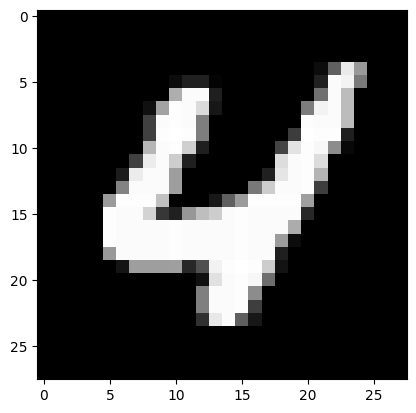

In [3]:
# Show a random image

img_array, label = train_dataset[6128]
img_array = img_array.squeeze().numpy()

print(f"Label = {label}")
plt.imshow(img_array, cmap="gray")
plt.show()

## Training

In [26]:
batch_size = 32

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=True)

In [27]:
def train_one_epoch(model, optimizer, criterion, train_loader, device):
    model.train()
    for images, labels in enumerate(train_loader):
        images, labels = images.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
    return loss.item()

def test_one_epoch(model, test_loader, device):
    # Compute test dataset accuracy
    model.eval()
    correct = 0
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        preds = model(images)
        pred_labels = preds.argmax(1)
        correct += (pred_labels == labels).sum()
    return correct.item() / len(test_dataset)

def train_mnist(model, optimizer, criterion, train_loader, test_loader, n_epochs = 50):
    device = "cuda" if torch.cuda.is_available() else "cpu"
    model.to(device)
    
    train_loss = []
    test_accuracy = []
    for epoch in range(n_epochs):
        # Train and return loss
        epoch_loss = train_one_epoch(model, optimizer, criterion, train_loader, device)
        train_loss.append(epoch_loss)
        
        # Test and return accuracy
        epoch_accuracy = test_one_epoch(model, test_loader, device)
        test_accuracy.append(epoch_accuracy)
    
        print(f"Epoch = {epoch}, Train Loss = {epoch_loss}, Test Accuracy = {epoch_accuracy}")

    return train_loss, test_accuracy

### MLP

In [28]:
sample_x = train_dataset[0][0]

input_size = torch.numel(sample_x.squeeze())
output_size = 10

model = MLP(input_size, output_size)
model

MLP(
  (classifier): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.2, inplace=False)
    (8): Linear(in_features=64, out_features=32, bias=True)
    (9): BatchNorm1d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): Dropout(p=0.2, inplace=False)
    (12): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [29]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

train_loss, test_accuracy = train_mnist(model, optimizer, criterion, train_loader, test_loader, n_epochs=25)

Epoch = 0, Train Loss = 0.5320156812667847, Test Accuracy = 0.9282
Epoch = 1, Train Loss = 0.25274115800857544, Test Accuracy = 0.9459
Epoch = 2, Train Loss = 0.3475345969200134, Test Accuracy = 0.9552
Epoch = 3, Train Loss = 0.30773043632507324, Test Accuracy = 0.9628
Epoch = 4, Train Loss = 0.28651756048202515, Test Accuracy = 0.9654
Epoch = 5, Train Loss = 0.21256227791309357, Test Accuracy = 0.967
Epoch = 6, Train Loss = 0.13279204070568085, Test Accuracy = 0.9714
Epoch = 7, Train Loss = 0.21189650893211365, Test Accuracy = 0.9728
Epoch = 8, Train Loss = 0.1821940541267395, Test Accuracy = 0.9739
Epoch = 9, Train Loss = 0.38621678948402405, Test Accuracy = 0.9747
Epoch = 10, Train Loss = 0.053791388869285583, Test Accuracy = 0.9762
Epoch = 11, Train Loss = 0.5038319230079651, Test Accuracy = 0.977
Epoch = 12, Train Loss = 0.17306435108184814, Test Accuracy = 0.9775
Epoch = 13, Train Loss = 0.08008865267038345, Test Accuracy = 0.9785
Epoch = 14, Train Loss = 0.19748921692371368, Tes

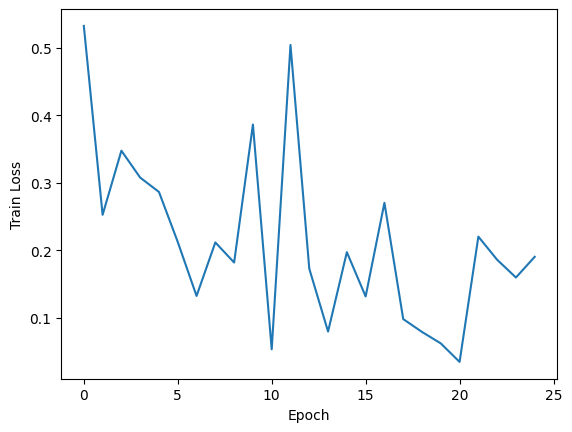

In [30]:
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.show()

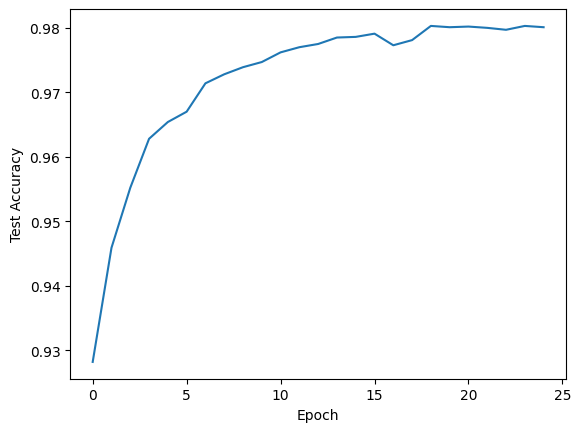

In [31]:
plt.plot(test_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()

### CNN

In [32]:
model = CNN(output_size=10)
model

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (output): Linear(in_features=1568, out_features=10, bias=True)
)

In [33]:
optimizer = torch.optim.SGD(model.parameters(), lr=0.005)
criterion = nn.CrossEntropyLoss()

train_loss, test_accuracy = train_mnist(model, optimizer, criterion, train_loader, test_loader, n_epochs=25)

Epoch = 0, Train Loss = 0.2603565454483032, Test Accuracy = 0.9225
Epoch = 1, Train Loss = 0.30844274163246155, Test Accuracy = 0.9536
Epoch = 2, Train Loss = 0.21671849489212036, Test Accuracy = 0.9631
Epoch = 3, Train Loss = 0.03866756707429886, Test Accuracy = 0.9737
Epoch = 4, Train Loss = 0.04394474998116493, Test Accuracy = 0.9775
Epoch = 5, Train Loss = 0.01526199746876955, Test Accuracy = 0.9793
Epoch = 6, Train Loss = 0.009292036294937134, Test Accuracy = 0.9804
Epoch = 7, Train Loss = 0.05383988842368126, Test Accuracy = 0.982
Epoch = 8, Train Loss = 0.02241501957178116, Test Accuracy = 0.9806
Epoch = 9, Train Loss = 0.21245701611042023, Test Accuracy = 0.9816
Epoch = 10, Train Loss = 0.005263130180537701, Test Accuracy = 0.9841
Epoch = 11, Train Loss = 0.02640392631292343, Test Accuracy = 0.9836
Epoch = 12, Train Loss = 0.22355294227600098, Test Accuracy = 0.9837
Epoch = 13, Train Loss = 0.0853419303894043, Test Accuracy = 0.9858
Epoch = 14, Train Loss = 0.008238807320594788

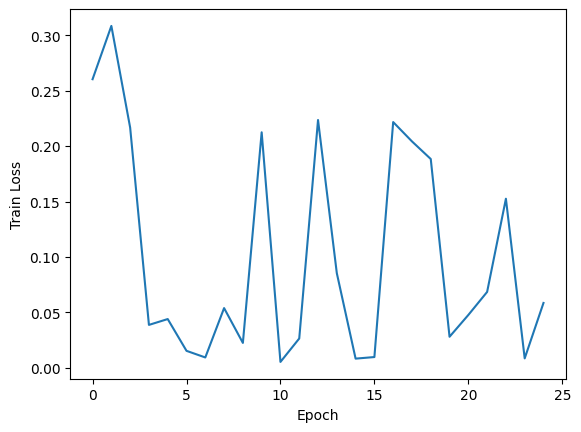

In [34]:
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Train Loss")
plt.show()

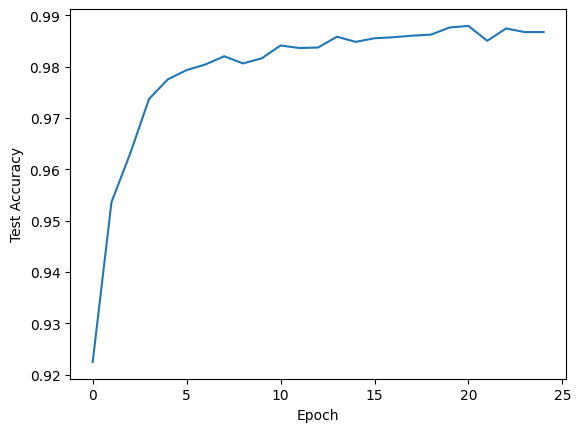

In [35]:
plt.plot(test_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Test Accuracy")
plt.show()